<a href="https://colab.research.google.com/github/coutinhoware/data-science/blob/main/ALURA/Redes%20Neurais%20Convolucionais%20-%20Deep%20Learning%20com%20PyTorch/3_3_Filtros_Convolucionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALURA/Redes Neurais Convolucionais - Deep Learning com PyTorch/

In [1]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve

%matplotlib inline

In [2]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15,5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

In [ ]:
! wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

(360, 330, 3)


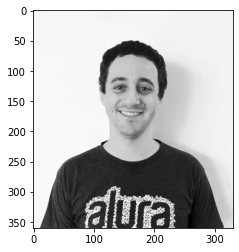

In [15]:
img = io.imread('GUI.jpg')
print(img.shape)

img = img[:,:,0]
plt.imshow(img, cmap='gray')